# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> 1. **Problem Statement:**
TikTok users frequently report videos that they believe violate the platform's terms of service. However, the sheer volume of daily video uploads and views makes it impractical for human moderators to review each one individually.

**Observation:**
Analysis reveals that when users do breach the terms of service, they tend to make factual claims rather than express personal opinions. Therefore, it is essential to distinguish between videos that present claims and those that convey opinions.

**Objective:**
TikTok aims to develop a machine learning model to effectively identify and categorize videos as either claims or opinions. Videos labeled as opinions will be exempt from human moderator review, while those labeled as claims will undergo further prioritization based on user reports. For instance, claim-labeled videos may be ranked by the frequency of reports, and only the top percentage will be reviewed by humans each day.

**Significance:**
Implementing a machine learning model will significantly streamline the moderation process, allowing TikTok to present human moderators with videos most likely to violate the platform's terms of service.

**Modeling Design and Target Variable**

Target Variable:
The dataset includes a column labeled "claim_status," which is a binary value indicating whether a video is a claim or an opinion. This will serve as the target variable for the model. In essence, the model's task is to predict whether each video is a claim or an opinion.

Classification Task:
This problem falls into the classification category because the model is making binary class predictions—claim or opinion.

**Selecting an Evaluation Metric**

Choosing the Right Metric:
To determine the most suitable evaluation metric, it is essential to consider the possible types of model errors:

False Positives: When the model incorrectly predicts that a video is a claim when it is, in fact, an opinion.
False Negatives: When the model incorrectly predicts that a video is an opinion when it is, in fact, a claim.
The choice of evaluation metric should weigh these two types of errors appropriately to ensure the model effectively serves its purpose.

2. 
In this context, prioritizing the model's avoidance of false negatives is of utmost importance, even if it results in occasional false positives. The primary goal is to accurately identify videos that infringe upon the platform's terms of service.

Misclassifying opinion videos as claims, which may occasionally occur, is a less critical error. In such cases, the video will still undergo human review, representing the worst-case scenario. On the other hand, misclassifying a claim as an opinion is a more severe mistake, as it would lead to the video not being reviewed at all, despite potentially violating the terms of service. This could result in a video being attributed to a "banned" author, as specified in the data dictionary.

Given the higher importance of minimizing false negatives, the chosen model evaluation metric will be recall. This metric ensures that the model effectively identifies videos that warrant human review, reducing the risk of overlooking content that violates TikTok's terms of service.

3. 

**Modeling Workflow and Model Selection Process**

Analysis of the dataset has shown that it comprises approximately 20,000 videos, a sufficiently sizable sample to support a robust model validation workflow. This workflow can be outlined in the following sequential steps:

Data Splitting: Divide the dataset into distinct training, validation, and test sets, allocated in a ratio of 60% for training, 20% for validation, and 20% for testing.

Model Training and Hyperparameter Tuning: Train various models and fine-tune their hyperparameters using the designated training set.

Final Model Selection: Identify the optimal model from the trained candidates based on its performance on the validation set.

Performance Evaluation: Evaluate the chosen champion model's performance using the reserved test set.

Below is a visual representation of this modeling workflow:

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###

import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###

import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
### YOUR CODE HERE ###

from sklearn.feature_extraction.text import CountVectorizer


# Import packages for data modeling
### YOUR CODE HERE ###

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance



Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###


Check for and handle outliers.

In [12]:
### YOUR CODE HERE ###
data.duplicated().sum()


0

Check class balance.

In [13]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].str.len()

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [15]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

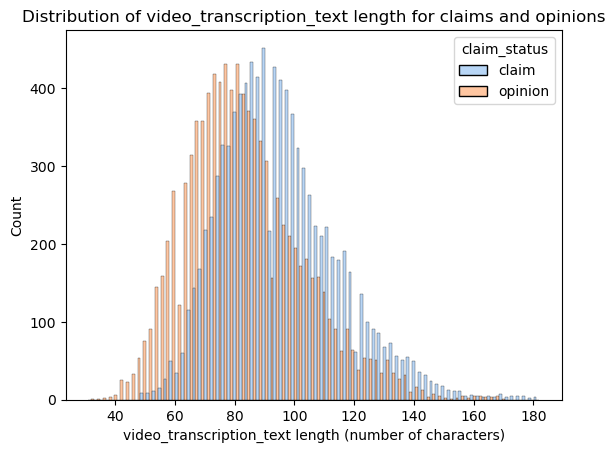

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###


sns.histplot(data = data, stat = 'count', multiple = 'dodge', x='text_length',
            kde=False, palette='pastel', hue='claim_status',
            element='bars', legend=True)

plt.xlabel('video_transcription_text length (number of characters)')
plt.ylabel('Count')
plt.title('Distribution of video_transcription_text length for claims and opinions')
plt.show()

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

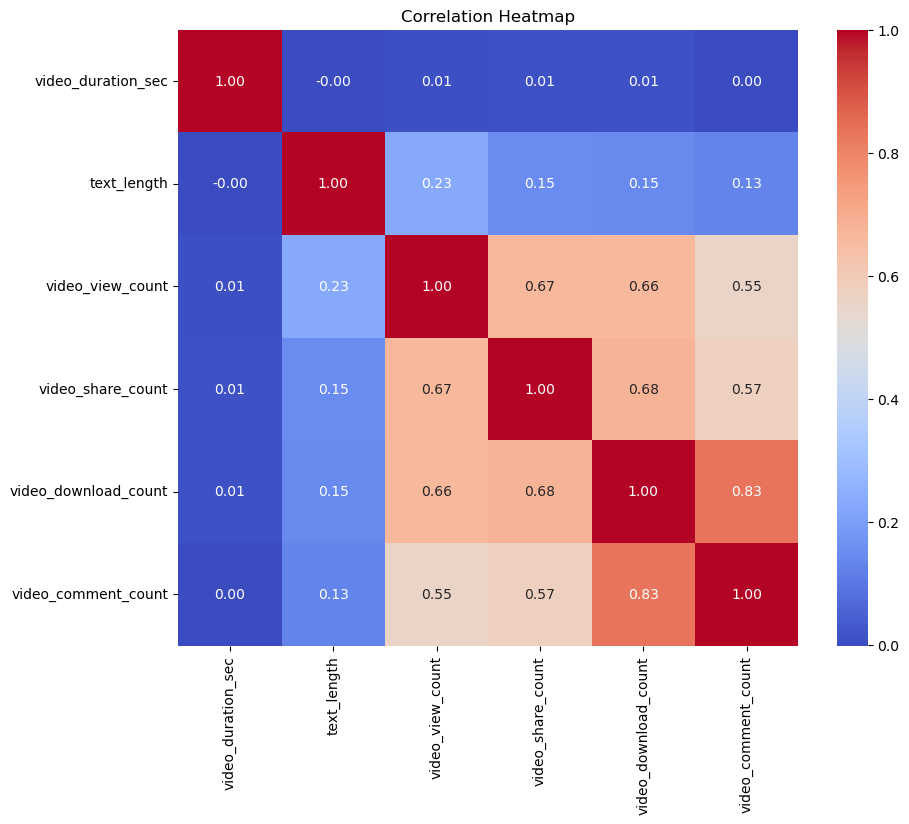

In [17]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###

variables_of_interest = ['video_duration_sec', 'text_length', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count']
correlation_matrix = data[variables_of_interest].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

Select the outcome variable.

In [18]:
# Select outcome variable
### YOUR CODE HERE ###


**Feature selection and transformation**

Encode target and catgorical variables.

In [19]:
### YOUR CODE HERE ###

# Display first few rows
### YOUR CODE HERE ###


X = data.copy()

X = X.drop(['#', 'video_id'], axis=1)

X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'],
                  drop_first = True)

X.head()


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4. Split the data**


Assign target variable.

In [20]:
### YOUR CODE HERE ###
y = X['claim_status']

Isolate the features.

In [21]:
#Isolate features
### YOUR CODE HERE ###

X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
### YOUR CODE HERE ###

X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [22]:
### YOUR CODE HERE ###

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [23]:
### YOUR CODE HERE ###

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, random_state = 0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [24]:

### YOUR CODE HERE ###

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

### **BONUS CONTENT - Tokenize text column**

**NOTE:** You are not expected to do this or know this, but you might find it useful and/or interesting to understand some basic ideas behind natural language processing (NLP), because of the nature of the data provided in this TikTok project.

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

`CountVectorizer` works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, `CountVectorizer` lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [25]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

Fit the vectorizer to the training data (generate the n-grams) and transform it (tally the occurrences). Only fit to the training data, not the validation or test data.

In [26]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Get n-gram counts for the validation data. Notice that the vectorizer is not being refit to the validation data. It's only transforming it. In other words, the transcriptions of the videos in the validation data are only being checked against the n-grams found in the training data.

In [29]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


Repeat the process to get n-gram counts for the test data. Again, don't refit the vectorizer to the test data. Just transform it.

In [32]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [33]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###

rf = RandomForestClassifier(random_state =0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###

cv_params = {'max_depth' : [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75, 100, 200],
    
}

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')


In [34]:
%%time 
rf_cv.fit(X_train_final, y_train)

CPU times: user 5min 36s, sys: 602 ms, total: 5min 37s
Wall time: 5min 37s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [35]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9948228253467271

In [36]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
import pickle

pickle.dump(rf_cv, open('rf_cv.sav', 'wb'))

In [37]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Question:** How well is your model performing? Consider average recall score and precision score.
The performance of this model is outstanding, achieving an average recall score of 0.995 across the five cross-validation folds. Furthermore, an examination of the precision score confirms that the model is not indiscriminately classifying all samples as claims. It is evident that this model consistently achieves near-perfect classification results.







### **Build an XGBoost model**

In [55]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###

xgb = XGBClassifier(objective='binary:logistic', random_state=0)


# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###

cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###

scoring = {'accuracy', 'precision', 'recall', 'f1'}


# Instantiate the GridSearchCV object
### YOUR CODE HERE ###

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')


In [56]:
%%time 
xgb_cv.fit(X_train_final, y_train)

CPU times: user 9min 46s, sys: 1.92 s, total: 9min 48s
Wall time: 4min 59s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [59]:
xgb_cv.best_score_

0.9906808769992594

In [60]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

In [1]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###

**Question:** How well does your model perform? Consider recall score and precision score.

This model also exhibits exceptional performance. While its recall score is marginally lower than that of the random forest model, it achieves a perfect precision score.








<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [41]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###

y_pred = rf_cv.best_estimator_.predict(X_val_final)



Display the predictions on the encoded testing set.

In [42]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###

y_pred

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [43]:
# Display the true labels of the testing set
### YOUR CODE HERE ###

y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

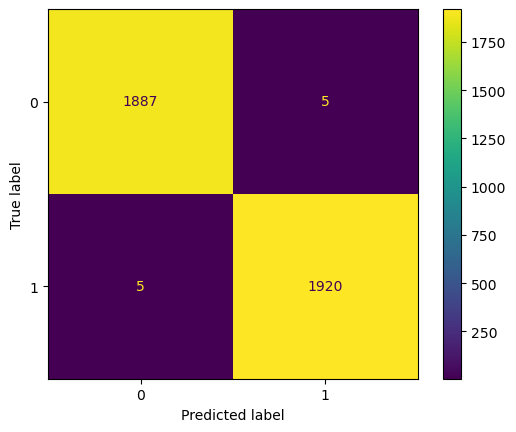

In [44]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###

log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###

log_disp = ConfusionMatrixDisplay (confusion_matrix = log_cm, display_labels= None)

# Plot confusion matrix
### YOUR CODE HERE ###

log_disp.plot()

# Display plot
### YOUR CODE HERE ###

plt.show()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [45]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###

target_labels = ['opinion', 'claim']

print(classification_report(y_val, y_pred, target_names = target_labels))


              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

The classification report provided above illustrates that the performance of the random forest model was exceptionally close to perfection. Examination of the confusion matrix reveals that there were a total of 10 misclassifications, evenly split between five false positives and five false negatives.







#### **XGBoost**

In [61]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

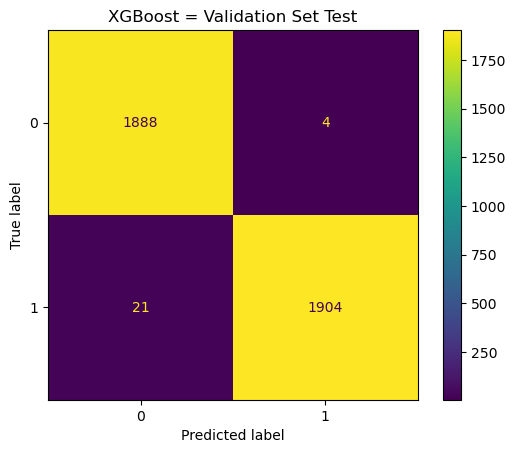

In [62]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

log_cm = confusion_matrix (y_val, y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###

log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###


log_disp.plot()
# Display plot
### YOUR CODE HERE ###


plt.title('XGBoost = Validation Set Test')

plt.show()


In [63]:
# Create a classification report
### YOUR CODE HERE ###

target_labels = ['opinion', 'claim']

print(classification_report(y_val, y_pred, target_names = target_labels))


              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The outcomes of the XGBoost model were similarly exceptional, with performance approaching perfection. However, it's noteworthy that the model's errors were predominantly false negatives. Given the priority of identifying claims, it is crucial for the model to excel at capturing all genuine claim videos. In this regard, the random forest model outperforms the XGBoost model, as it boasts a superior recall score, making it the champion model for this task.







### **Use champion model to predict on test data**

In [67]:
### YOUR CODE HERE ###

y_pred = rf_cv.best_estimator_.predict(X_test_final)


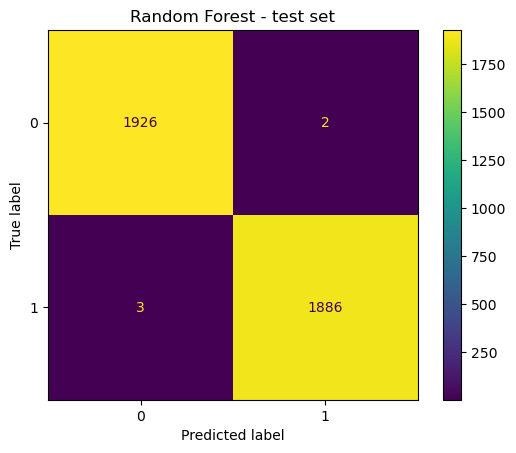

In [68]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###

log_disp.plot()
# Display plot
### YOUR CODE HERE ###


plt.title('Random Forest - test set')
plt.show()

#### **Feature importances of champion model**


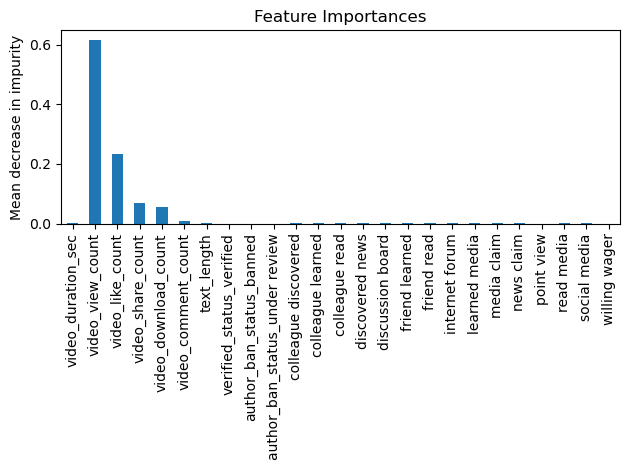

In [71]:
### YOUR CODE HERE ###


importances = rf_cv.best_estimator_.feature_importances_

rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()

rf_importances.plot.bar(ax=ax)

ax.set_title('Feature Importances')

ax.set_ylabel('Mean decrease in impurity')

fig.tight_layout()


**Question:** Describe your most predictive features. Were your results surprising?

It comes as no surprise that the most influential features in the model were all linked to the engagement levels generated by the video. This aligns with earlier exploratory data analysis (EDA), which had already indicated this outcome.







### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> 
1. 
Would you recommend using this model? Why or why not?
Certainly, I would recommend utilizing this model. It demonstrated excellent performance on both the validation and test holdout data, consistently achieving high precision and F1 scores. The model's proficiency in classifying claims and opinions further strengthens its recommendation.

2. 
What was your model doing? Can you explain how it was making predictions?
The model was making predictions by leveraging user engagement-related features associated with each video. It categorized videos based on metrics such as the number of views, likes, shares, and downloads they received.

3. 
Are there new features that you can engineer that might improve model performance?
Given the current near-perfect performance of the model, there is no immediate need for feature engineering.

4. 
What features would you want to have that would likely improve the performance of your model?
While the current model is performing exceptionally well, having access to additional features, such as the number of times a video was reported and the total number of user reports for all videos posted by each author, could potentially further enhance its performance.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.